In [1]:
from __future__ import print_function 
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual 
from IPython.core.display import display, HTML

import pandas as pd
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sb
import squarify 

%matplotlib inline

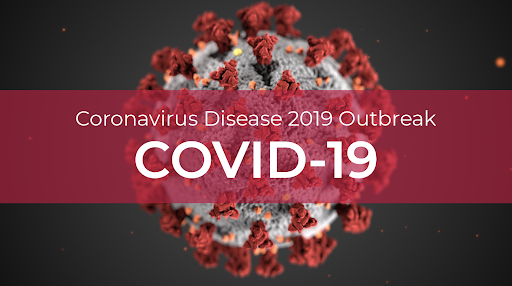

# Analyzing the COVID-19 outbreak cases
Here, we can see the analysis results of all the cases of COVID-19 outbreak, i.e., number of confirmed cases, death cases, recovered cases, and active cases globally.

In [2]:
#Data Collection
# Retrieving the LIVE COVID19 Stats updated by John Hopkins University in github
# Loading data right from the source:
country = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')

In [3]:
# Renaming
country = country.rename(columns={'Country_Region': 'Country'})

# Total number of cases and number of countries affected

In [4]:
#Displaying total nurmber of confirmed, deaths, recovered and active cases
confirmed_total = int(country['Confirmed'].sum())
deaths_total = int(country['Deaths'].sum())
recovered_total = int(country['Recovered'].sum())
active_total = int(country['Active'].sum())
death_rate = (deaths_total/confirmed_total)*100
recovered_rate = (recovered_total/confirmed_total)*100
countries = country.Country.count()

#print("Total number of Confirmed Cases : ", confirmed_total)
#print("Total number of Death Cases : ", deaths_total)
#print("Total number of Recovered Cases : ", recovered_total)
#print("Total number of Active Cases : ", active_total)
#print("World Death Rate : ", death_rate)
#print("World Recovery Rate : ", recovered_rate)
#print("Total number of Countries affected : ", countries)

In [5]:
# displaying the total stats

display(HTML("<div style = 'background-color: #504e4e; padding: 30px '>" +
             "<span style='color: #fff; font-size:30px;'> Last Updated on : "  + str(confirmed_total) +"</span>" +
             "<br />"+ 
             "<span style='color: #fff; font-size:30px;'> Confirmed : "  + str(confirmed_total) +"</span>" +
             "<br />"+ 
             "<span style='color: red; font-size:30px;'> Deaths : " + str(deaths_total) + "</span>"+
             "<br />"+ 
             "<span style='color: lightgreen; font-size:30px; '> Recovered : " + str(recovered_total) + "</span>"+
             "<br />"+ 
             "<span style='color: yellow; font-size:30px;'> Active : "  + str(active_total) +"</span>" +
             "<br />"+ 
             "</div>")
       )

In [6]:
sorted_confirmed_country = country.sort_values('Confirmed', ascending = False) 
sorted_death_country = country.sort_values('Deaths', ascending = False) 
sorted_recovered_country = country.sort_values('Recovered', ascending = False)
sorted_active_country = country.sort_values('Active',ascending=False) 
sorted_country = pd.merge(sorted_confirmed_country,sorted_death_country)
sorted_country = pd.merge(sorted_country,sorted_recovered_country)
sorted_country = pd.merge(sorted_country,sorted_active_country)
sorted_country_drop = country.drop(['Last_Update','Lat', 'Long_', 'Incident_Rate', 'People_Tested',
       'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3'],axis =1)
sorted_country_drop['Death Rate (%)'] = (sorted_country_drop['Deaths']/sorted_country_drop['Confirmed'])*100
sorted_country_drop['Recovery Rate (%)'] = (sorted_country_drop['Recovered']/sorted_country_drop['Confirmed'])*100
#sorted_country_drop

# Enter the number of countries for which you want the COVID-19 outbreak cases

In [7]:
# sorting the values by confirmed descednding order
fig = go.FigureWidget( layout=go.Layout() )
def highlight_col(x):
    r = 'background-color: red'
    b = 'background-color: blue'
    g = 'background-color: green'
    y = 'background-color: yellow'
    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
    df1.iloc[:, 4] = b
    df1.iloc[:, 5] = r
    df1.iloc[:, 6] = g
    df1.iloc[:, 7] = y
    
    return df1

def show_latest_cases(n):
    n = int(n)
    return country.sort_values('Confirmed', ascending= False).head(n).style.apply(highlight_col, axis=None)

interact(show_latest_cases, n='10')

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none' # uncomment this, run cell again - then the graph/figure disappears
widgets.VBox([fig], layout=ipywLayout)

interactive(children=(Text(value='10', description='n'), Output()), _dom_classes=('widget-interact',))

    'data': [], 'layout': {'template': '...'}
}),), layout=Layout(border='solid …

# Slide to check the detailed information in each representation

# Bubble chart representation

In [8]:
# # plotting the worst affected countries

def bubble_chart(n):
    fig = px.scatter(sorted_country.head(n), x="Country", y="Confirmed", size="Confirmed", color="Country",
               hover_name="Country", size_max=70)
    fig.update_layout(
    title=str(n) +" Worst affected countries",
    xaxis_title="Countries",
    yaxis_title="Confirmed Cases",
    width = 700
    )
    fig.show()

interact(bubble_chart, n=10)

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none'
#widgets.VBox([fig], layout=ipywLayout)

interactive(children=(IntSlider(value=10, description='n', max=30, min=-10), Output()), _dom_classes=('widget-…

# Choropleth map representation

In [9]:
fig = px.choropleth(country, locations = 'Country', locationmode = 'country names', color = 'Confirmed', animation_frame = 'Last_Update')
fig.update_layout(title_text = 'Countries with Confirmed cases',)
fig.show()
fig = px.choropleth(country, locations = 'Country', locationmode = 'country names', color = 'Deaths', animation_frame = 'Last_Update')
fig.update_layout(title_text = 'Countries with Deaths Reported')
fig.show()
fig = px.choropleth(country, locations = 'Country', locationmode = 'country names', color = 'Recovered', animation_frame = 'Last_Update')
fig.update_layout(title_text = 'Countries with Recovered cases')
fig.show()
fig = px.choropleth(country, locations = 'Country', locationmode = 'country names', color = 'Active', animation_frame = 'Last_Update')
fig.update_layout(title_text = 'Countries with Active cases')
fig.show()

# Bar chart representation

In [10]:
def bar_chart(n):
    fig = px.bar(
    sorted_country.head(n),
    x = "Country",
    y = "Confirmed",
    title= "Top "+ str(n) + " worst affected countries with highest number of confirmed cases", # the axis names
    color_discrete_sequence=["blue"], 
    height=500,
    width=800
)

    fig.show()

interact(bar_chart, n=10)

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none'

def bar_chart(n):
    fig = px.bar(
    sorted_death_country.head(n),
    x = "Country",
    y = "Deaths",
    title= "Top "+ str(n) + " worst affected countries with highest number of death cases", # the axis names
    color_discrete_sequence=["red"], 
    height=500,
    width=800
)

    fig.show()

interact(bar_chart, n=10)

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none'


def bar_chart(n):
    fig = px.bar(
    sorted_recovered_country.head(n),
    x = "Country",
    y = "Recovered",
    title= "Top "+ str(n) + " worst affected countries with highest number of recovered cases", # the axis names
    color_discrete_sequence=["green"], 
    height=500,
    width=800
)

    fig.show()

interact(bar_chart, n=10)

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none'

def bar_chart(n):
    fig = px.bar(
    sorted_active_country.head(n),
    x = "Country",
    y = "Active",
    title= "Top "+ str(n) + " countries with highest number of recovered cases", # the axis names
    color_discrete_sequence=["yellow"], 
    height=500,
    width=800
)

    fig.show()

interact(bar_chart, n=10)

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none'

interactive(children=(IntSlider(value=10, description='n', max=30, min=-10), Output()), _dom_classes=('widget-…

interactive(children=(IntSlider(value=10, description='n', max=30, min=-10), Output()), _dom_classes=('widget-…

interactive(children=(IntSlider(value=10, description='n', max=30, min=-10), Output()), _dom_classes=('widget-…

interactive(children=(IntSlider(value=10, description='n', max=30, min=-10), Output()), _dom_classes=('widget-…

# Pie Chart representation

In [11]:
def pie_chart(n):
    fig = px.pie(sorted_confirmed_country.head(n), values='Confirmed', names='Country',
             title='Confirmed cases (%) across top '+str(n)+' countries',
              hover_data=['Last_Update'], labels={'Last_Update':'Months'})
    fig.update_traces(textposition='inside')
    fig.show()
interact(pie_chart,n=10);

def pie_chart(n):
    fig = px.pie(sorted_death_country.head(n), values='Deaths', names='Country',
             title='Deaths reported (%) across top '+str(n)+' countries',
              hover_data=['Last_Update'], labels={'Last_Update':'Months'})
    fig.update_traces(textposition='inside')
    fig.show()
interact(pie_chart,n=10);

def pie_chart(n):
    fig = px.pie(sorted_recovered_country.head(n), values='Recovered', names='Country',
             title='Recovered cases (%) across top '+str(n)+' countries',
              hover_data=['Last_Update'], labels={'Last_Update':'Months'})
    fig.update_traces(textposition='inside')
    fig.show()
interact(pie_chart,n=10);

def pie_chart(n):
    fig = px.pie(sorted_active_country.head(n), values='Active', names='Country',
             title='Active cases (%) across top '+str(n)+' countries',
              hover_data=['Last_Update'], labels={'Last_Update':'Months'})
    fig.update_traces(textposition='inside')
    fig.show()
interact(pie_chart,n=10);

interactive(children=(IntSlider(value=10, description='n', max=30, min=-10), Output()), _dom_classes=('widget-…

interactive(children=(IntSlider(value=10, description='n', max=30, min=-10), Output()), _dom_classes=('widget-…

interactive(children=(IntSlider(value=10, description='n', max=30, min=-10), Output()), _dom_classes=('widget-…

interactive(children=(IntSlider(value=10, description='n', max=30, min=-10), Output()), _dom_classes=('widget-…

## Treemap view

In [12]:
fig = px.treemap(sorted_confirmed_country, path = ['Country', 'Confirmed'], values = 'Confirmed',
                title="Top countries with most number of Confirmed cases")
fig.show();

fig = px.treemap(sorted_death_country, path = ['Country', 'Deaths'], values = 'Deaths',
                title="Top countries with most number of Death cases")
fig.show();

fig = px.treemap(sorted_recovered_country, path = ['Country', 'Recovered'], values = 'Recovered',
                title="Top countries with most number of Recovered cases")
fig.show();

fig = px.treemap(sorted_active_country, path = ['Country', 'Active'], values = 'Active',
                title="Top countries with most number of Active cases")
fig.show();

# Box plot representation
Box plot is a type of chart that shows the distribution of a numerical data and its skewness by displaying the quartile (or percentile) values of data and average values.

In [13]:
sorted_country_drop = sorted_country_drop.drop(['Death Rate (%)','Recovery Rate (%)'],axis =1)

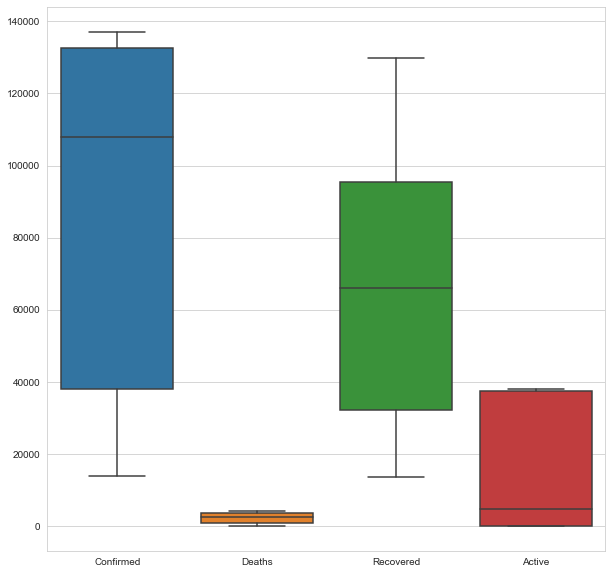

In [14]:
sb.set_style('whitegrid')
plt.figure(figsize=(10,10))
sb.boxplot(data = sorted_country_drop.head())
plt.show()

# Heat map representation
Heat map is a data visualization technique that shows the magnitude of a phenomenon as colour in two-dimension. It shows the correlation between two statistical variables. 

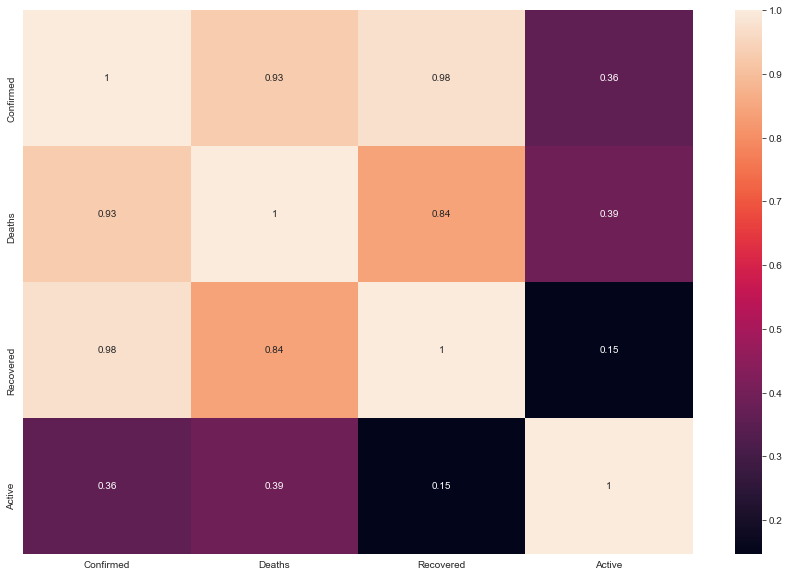

In [15]:
plt.figure(figsize=(15,10))
sb.heatmap(sorted_country_drop.corr(), annot=True)

plt.show()

In [16]:
display(HTML("<span style = 'margin-left;'>&#169; </span>" + "<span>Lakshmi Anush</span>"))